In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X = train_df.drop('label',axis=1).values
X = X/255.0
y = train_df['label'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [12]:
X_train.shape,X_test.shape

((33600, 784), (8400, 784))

In [13]:
y_train.shape

(33600,)

In [14]:
model = Sequential()

model.add(Dense(128,activation='relu',input_shape=(784,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10,activation='softmax'))


In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(X_train,y_train,epochs=10)

Train on 33600 samples
Epoch 1/10
33600/33600 [==============================] - 18s 541us/sample - loss: 0.4570 - accuracy: 0.8610
Epoch 2/10
33600/33600 [==============================] - 3s 102us/sample - loss: 0.2436 - accuracy: 0.9268
Epoch 3/10
33600/33600 [==============================] - 3s 103us/sample - loss: 0.1971 - accuracy: 0.9403
Epoch 4/10
33600/33600 [==============================] - 4s 105us/sample - loss: 0.1703 - accuracy: 0.9491
Epoch 5/10
33600/33600 [==============================] - 3s 104us/sample - loss: 0.1531 - accuracy: 0.9538
Epoch 6/10
33600/33600 [==============================] - 3s 103us/sample - loss: 0.1394 - accuracy: 0.9579
Epoch 7/10
33600/33600 [==============================] - 4s 106us/sample - loss: 0.1253 - accuracy: 0.9614
Epoch 8/10
33600/33600 [==============================] - 4s 114us/sample - loss: 0.1200 - accuracy: 0.9638
Epoch 9/10
33600/33600 [==============================] - 4s 114us/sample - loss: 0.1122 - accuracy: 0.9654
Epoc

In [17]:
model.evaluate(X_test,y_test)

8400/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.08396781480383306, 0.97511905]

In [19]:
y_pred = model.predict_classes(X_test)

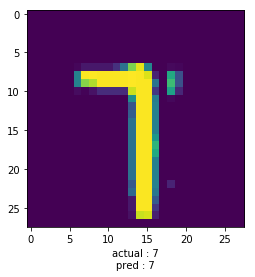

In [31]:
i=6
plt.imshow((X_test[i]*255).reshape(28,28))
plt.xlabel(f'actual : {y_test[i]}\npred : {y_pred[i]}')
plt.show()